# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

## Regressão Linear - Exercício

Utilizando o dataset dos filmes, aplique a regressão linear para predizer o `US Gross` de acordo com o `Production Budget`.

Primeiro carregue os dados:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
filmes = pd.read_csv('movies.csv')

Visualize os dados com um gráfico de dispersão:

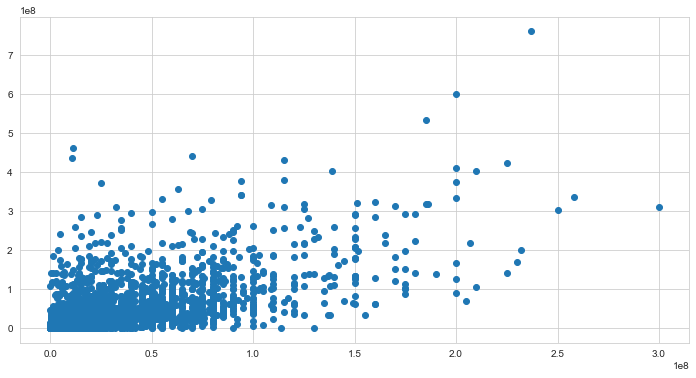

In [2]:
import numpy as np

x = filmes['Production Budget']
y = filmes['US Gross']
plt.figure(figsize=(12,6))
plt.scatter(x, y)

In [3]:
filmes.head()

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,165.0


In [4]:
filmes['US Gross'].loc[filmes['US Gross'].isnull()]

118    NaN
254    NaN
266    NaN
404    NaN
467    NaN
1025   NaN
1028   NaN
Name: US Gross, dtype: float64

In [5]:
filmes['Production Budget'].loc[filmes['Production Budget'].isnull()]

1271   NaN
Name: Production Budget, dtype: float64

In [6]:
filmes = filmes.dropna(subset=['US Gross','Production Budget'])

In [7]:
x = np.array(filmes['Production Budget']).reshape(-1,1)
y = np.array(filmes['US Gross']).reshape(-1,1)

Use a regressão linear para encontrar os coeficientes a e b:

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x,y)
a = model.coef_[0][0]
b = model.intercept_[0]
a,b

(1.0957226466834886, 9896486.13654355)

Utilize a função `show_regression` abaixo para visualizar o resultado da regressão linear. Nesta função, você deve passar as coordenadas x dos pontos, as coordenadas y, o coeficiente a e o coeficiente b.

In [9]:
#### NÃO ALTERAR ESSE CÓDIGO ####

import matplotlib.pyplot as plt

def gen_line(x_min, x_max, n_points, a, b):
    interval = x_max-x_min
    interval_value = interval/n_points
    
    x_result = []
    y_result = []

    for i in range(n_points):
        current_x = x_min+i*interval_value
        x_result.append(current_x)
        y_result.append(a*current_x + b)
        
    return x_result, y_result

def show_regression(x, y, a, b):
    N = 100

    plt.scatter(x, y)

    line_1 = gen_line(min(x), max(x), N, a, b)
    plt.plot(line_1[0], line_1[1], c= "red")

    plt.gca()
    plt.show()

Exemplo de uso da função:

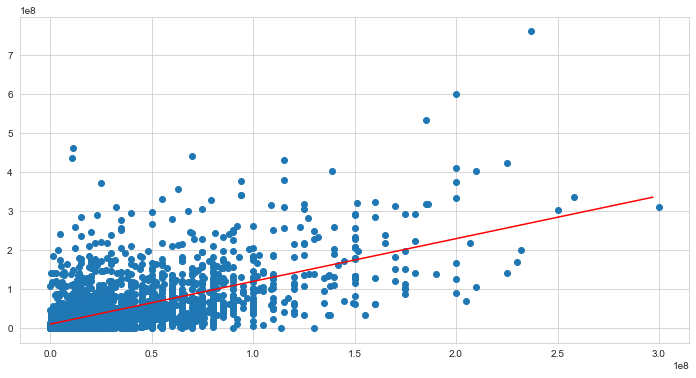

In [10]:
plt.figure(figsize=(12,6))
show_regression(x, y, a, b)

A função `predict` recebe um production budget de um filme e retorna a predição do US Gross para ele:

In [11]:
def predict(production_budget):
    """
    >>> f'{predict(100000):.2f}'
    '10006058.40'
    
    >>> f'{predict(1000000):.2f}'
    '10992208.78'

    >>> f'{predict(5000000):.2f}'
    '15375099.37'
    """
    y_pred = a*production_budget + b
    
    return y_pred

print(f'{predict(100000):.2f}')
print(f'{predict(1000000):.2f}')
print(f'{predict(5000000):.2f}')

10006058.40
10992208.78
15375099.37


## Teste

In [12]:
import doctest

doctest.testmod(verbose=True)

Trying:
    f'{predict(100000):.2f}'
Expecting:
    '10006058.40'
ok
Trying:
    f'{predict(1000000):.2f}'
Expecting:
    '10992208.78'
ok
Trying:
    f'{predict(5000000):.2f}'
Expecting:
    '15375099.37'
ok
3 items had no tests:
    __main__
    __main__.gen_line
    __main__.show_regression
1 items passed all tests:
   3 tests in __main__.predict
3 tests in 4 items.
3 passed and 0 failed.
Test passed.


TestResults(failed=0, attempted=3)